<span style="display:block; font-size:2.5rem; color:yellow;">Car Resale Price - Random Forest Regressor<span>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Engine                     6019 non-null   float64
 1   Fuel_Type_Diesel           6019 non-null   bool   
 2   Fuel_Type_Electric         6019 non-null   bool   
 3   Fuel_Type_LPG              6019 non-null   bool   
 4   Fuel_Type_Petrol           6019 non-null   bool   
 5   Kilometers_Driven          6019 non-null   int64  
 6   Owner_Type_Fourth & Above  6019 non-null   bool   
 7   Owner_Type_Second          6019 non-null   bool   
 8   Owner_Type_Third           6019 non-null   bool   
 9   Power                      6019 non-null   float64
 10  Price                      6019 non-null   float64
 11  Region_North               6019 non-null   bool   
 12  Region_South               6019 non-null   bool   
 13  Region_West                6019 non-null   bool 

In [5]:
data.describe()

,Engine,Kilometers_Driven,Power,Price,Seats,Year,car_age,mileage_no,mileage_unit_km/kg,mileage_unit_kmpl,car_make_encoded,car_model_encoded
count,6019.000000,6019.000000,6019.000000,6019.000000,6019.0,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,1612.267736,56106.896661,110.733205,7.708463,5.0,2013.374149,11.625851,18.334845,0.010965,0.989035,15.332281,108.485961
std,567.841277,30040.626708,46.891505,5.769853,0.0,3.213540,3.213540,4.127370,0.104148,0.104148,8.052311,65.515028
min,72.000000,171.000000,34.200000,0.440000,5.0,2003.500000,6.000000,6.850000,0.000000,0.000000,0.000000,0.000000
25%,1198.000000,34000.000000,75.000000,3.500000,5.0,2011.000000,9.000000,15.400000,0.000000,1.000000,9.000000,51.000000
50%,1493.000000,53000.000000,93.700000,5.640000,5.0,2014.000000,11.000000,18.330000,0.000000,1.000000,17.000000,99.000000
75%,1969.000000,73000.000000,138.100000,9.950000,5.0,2016.000000,14.000000,21.100000,0.000000,1.000000,19.000000,169.000000
max,3125.500000,131500.000000,232.750000,19.625000,5.0,2019.000000,21.500000,29.650000,1.000000,1.000000,30.000000,211.000000


In [6]:
data.head()

,Engine,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Kilometers_Driven,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Power,...,Year,car_age,car_make,car_model,car_spec,mileage_no,mileage_unit_km/kg,mileage_unit_kmpl,car_make_encoded,car_model_encoded
0,1489.0,True,False,False,False,80000,False,False,True,35.5,...,2003.5,21.5,Ambassador,Classic,Nova Diesel,12.80,0,1,0,46
1,1968.0,True,False,False,False,79271,False,False,False,143.0,...,2014.0,11.0,Audi,A3,35 TDI Attraction,20.38,0,1,1,9
2,1968.0,True,False,False,False,22000,False,True,False,143.0,...,2017.0,8.0,Audi,A3,35 TDI Technology,20.38,0,1,1,9
3,1968.0,True,False,False,False,20003,False,False,False,143.0,...,2016.0,9.0,Audi,A3,35 TDI Premium,20.38,0,1,1,9
4,1968.0,True,False,False,False,39000,False,False,False,143.0,...,2016.0,9.0,Audi,A3,35 TDI Premium Plus,20.38,0,1,1,9


In [11]:
X = data.drop(columns=['Price', "car_make", "car_model", "car_spec"])
y = data['Price']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print('Best Parameters:', grid_search.best_params_)
print('Best RMSE:', (-grid_search.best_score_)**0.5)

c:\Users\Ashu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
89 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ashu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ashu\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Ashu\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Ashu\anaconda3\Lib\site-packages\skl

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best RMSE: 1.4513784086947523


In [14]:
RandomForest = RandomForestRegressor(**grid_search.best_params_)

In [17]:
RandomForest.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=200)

In [18]:
RandomForest_predictions = RandomForest.predict(X_test)
print(RandomForest_predictions)

[ 6.41405     4.3220869   4.28525881 ...  5.92222146 18.62175
  7.1392    ]


In [ ]:
mse = mean_squared_error(y_test, RandomForest_predictions)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, RandomForest_predictions)
print(f"R-Squared: {r2}")
rmse = np.sqrt(mean_squared_error(y_test, RandomForest_predictions))
print(f"RMSE: {rmse:.2f}")

Mean Squared Error: 2.0981789498917425
R-Squared: 0.9398066702677477
RMSE: 1.45


In [30]:
model = make_pipeline(StandardScaler(), RandomForestRegressor(**grid_search.best_params_))
scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
rmse_scores = (-scores)**0.5
print("Cross-validated RMSE:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())

Cross-validated RMSE: [3.63382528 1.79821241 1.62232474 1.40303939 2.26204921 1.41483328
 0.93984954 3.58972972 2.25270557 2.63367123]
Average RMSE: 2.1550240364910684


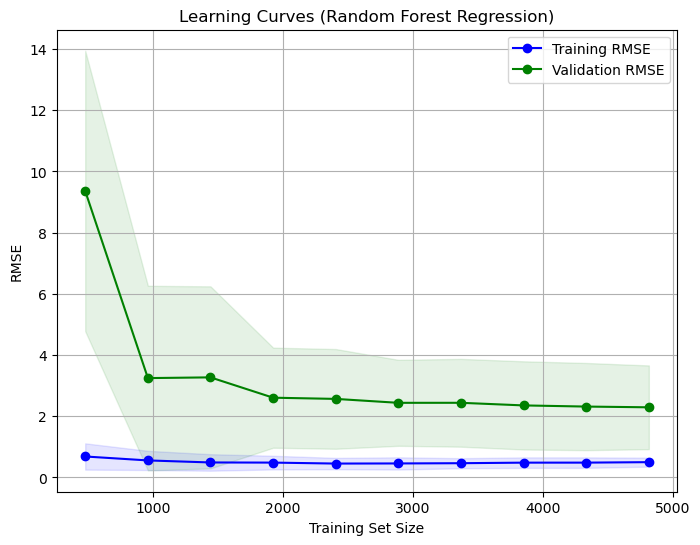

In [32]:
model = make_pipeline(StandardScaler(), RandomForestRegressor(**grid_search.best_params_))

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    model, X, y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Calculate means and std deviations of RMSE for train and validation
train_rmse_mean = np.sqrt(-train_scores.mean(axis=1))
train_rmse_std = np.sqrt(train_scores.std(axis=1))
val_rmse_mean = np.sqrt(-val_scores.mean(axis=1))
val_rmse_std = np.sqrt(val_scores.std(axis=1))

# Plot learning curves
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_rmse_mean, 'o-', color='blue', label='Training RMSE')
plt.fill_between(train_sizes, train_rmse_mean - train_rmse_std, train_rmse_mean + train_rmse_std, alpha=0.1, color='blue')
plt.plot(train_sizes, val_rmse_mean, 'o-', color='green', label='Validation RMSE')
plt.fill_between(train_sizes, val_rmse_mean - val_rmse_std, val_rmse_mean + val_rmse_std, alpha=0.1, color='green')
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.title("Learning Curves (Random Forest Regression)")
plt.legend()
plt.grid(True)
plt.show()